# 📊 EDA & 🧠 Sentiment Analysis: Review Aplikasi Sajda

In [33]:
# STEP 1: Install package tambahan
!pip install wordcloud seaborn
!pip install nltk


In [34]:
# STEP 2: Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')

# Styling visualisasi
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# STEP 3: Load data dari GitHub (ganti kalau URL-nya beda)
url = 'https://raw.githubusercontent.com/mauliidna/sentiment-sajda/refs/heads/main/igreview.csv'
df = pd.read_csv(url)


In [36]:
# STEP 4: Cek data awal
print("Jumlah data:", df.shape)
print(df.head())
print(df.info())
print(df.describe())


Jumlah data: (100, 11)
                               reviewId                userName  \
0  9ee26824-f315-442a-9c3f-12123a21faeb         Muhammad Arsyad   
1  6fae55a5-6c21-435e-b088-822ec0e5b903  Maulidya Hidayatunnisa   
2  79d9ef4f-6471-4158-995f-ce8300ae2feb       Hasyimadnan Adnan   
3  7058078f-6f68-41b0-9899-d01528665cd4          Affan bin Arwa   
4  dca87eeb-842f-4448-8b99-a728b9f2ae04           Dammar Hakimm   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a/ACg8oc...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                             content  score  thumbsUpCount  \
0                                    pokoknya mantap      5              0   
1  lu jangan nampilin ular di beranda gua oon, ka...      1              0   
2  

In [37]:
# STEP 5: Hitung panjang teks review
df['review_length'] = df['content'].astype(str).apply(len)


<ipython-input-38-c219e78e483a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


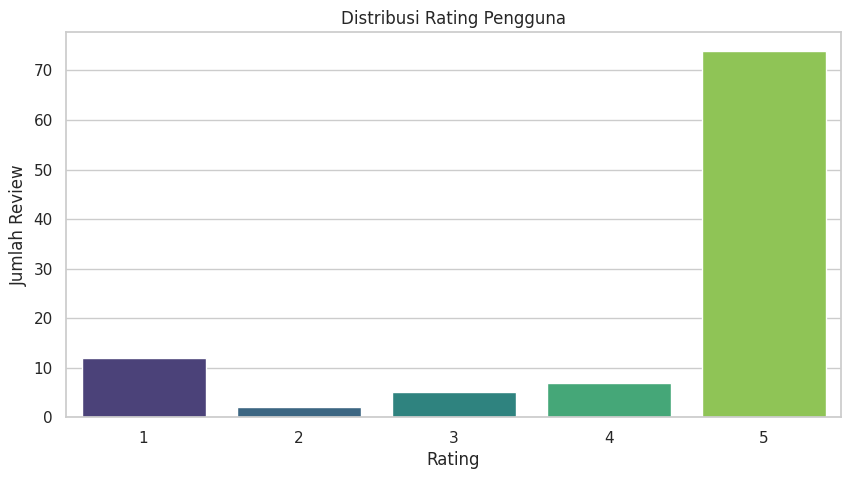

In [38]:
# STEP 6: Visualisasi jumlah review per rating
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribusi Rating Pengguna')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()


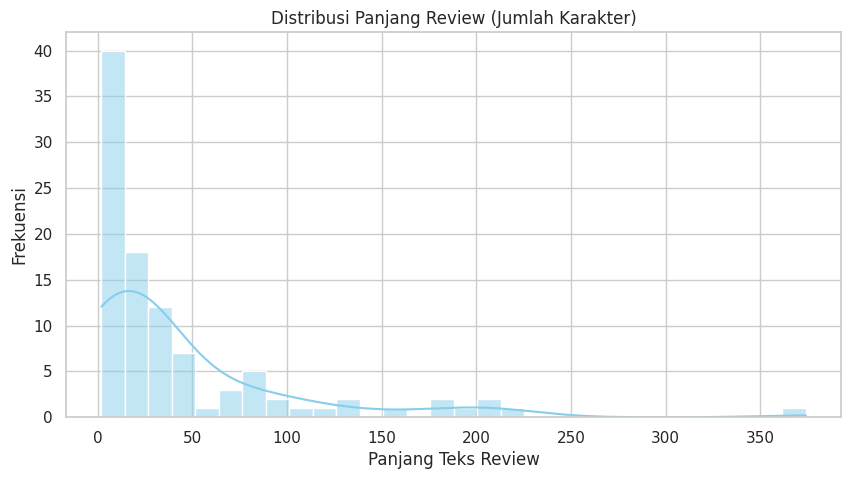

In [39]:
# STEP 7: Visualisasi panjang review
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Panjang Review (Jumlah Karakter)')
plt.xlabel('Panjang Teks Review')
plt.ylabel('Frekuensi')
plt.show()


In [40]:
# STEP 8: Buat kolom label sentimen (positif, netral, negatif)
def label_sentiment(score):
    if score <= 2:
        return 'negatif'
    elif score == 3:
        return 'netral'
    else:
        return 'positif'

df['sentimen'] = df['score'].apply(label_sentiment)


<ipython-input-41-4be5d3e58b1c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df, order=['negatif', 'netral', 'positif'], palette='Set2')


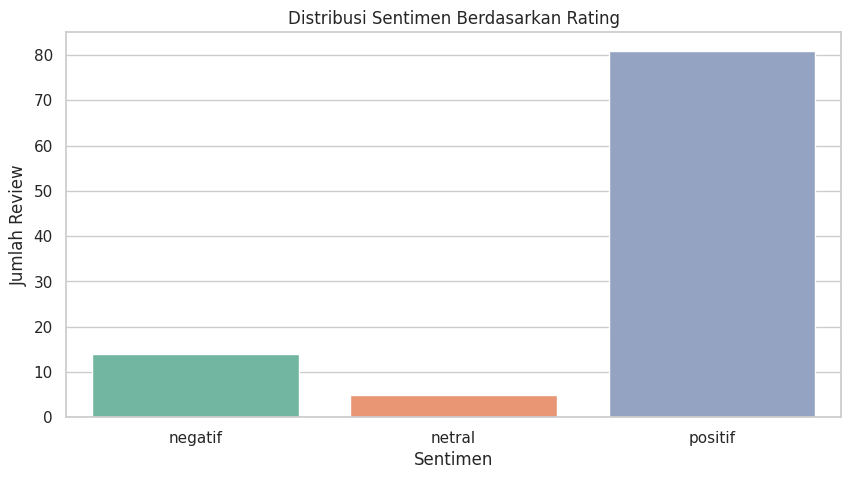

In [41]:
# STEP 9: Visualisasi jumlah review per sentimen
sns.countplot(x='sentimen', data=df, order=['negatif', 'netral', 'positif'], palette='Set2')
plt.title('Distribusi Sentimen Berdasarkan Rating')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Review')
plt.show()


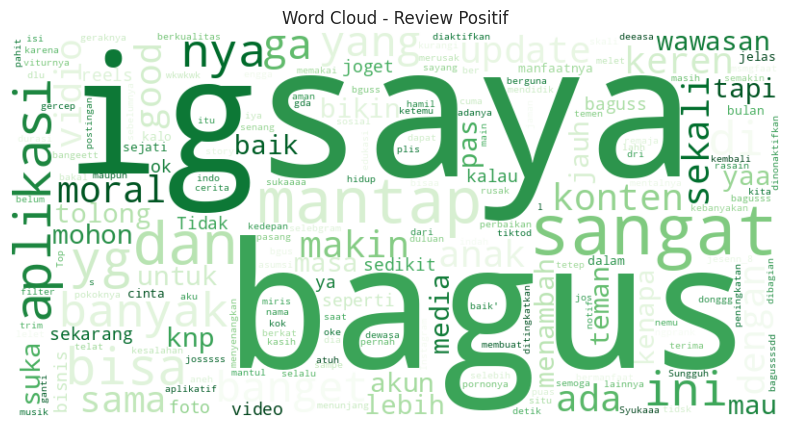

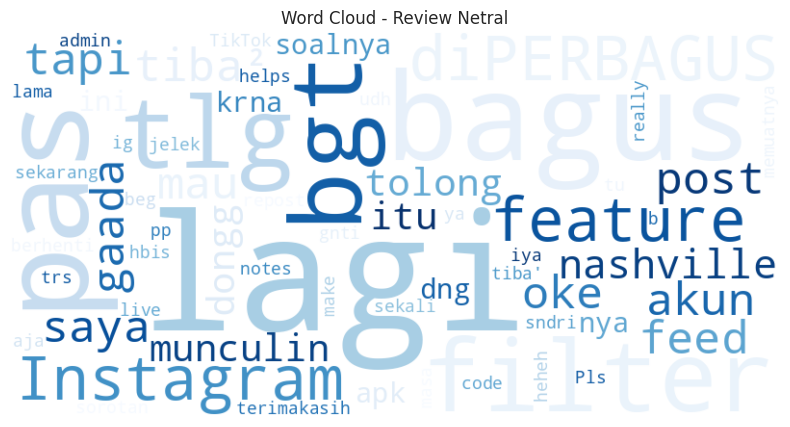

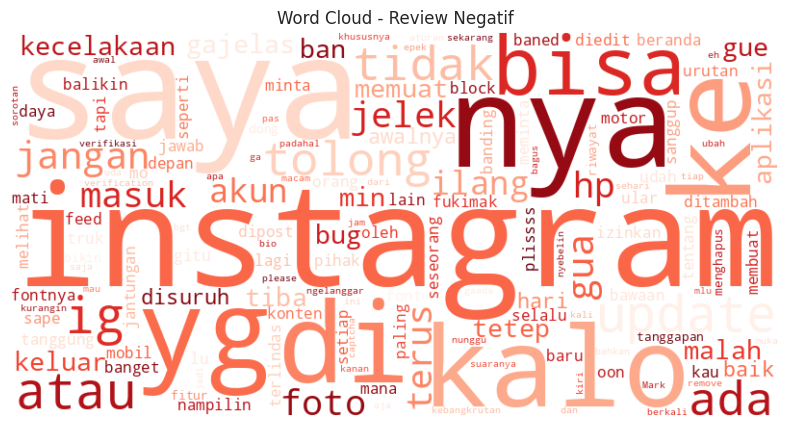

In [42]:
# STEP 10: Wordcloud untuk tiap sentimen
def show_wordcloud(data, title, color):
    # Gabung semua teks, buang NaN
    text = " ".join(data.dropna().astype(str).tolist())

    if len(text.strip()) == 0:
        print(f"Tidak ada data untuk {title}. Lewati WordCloud.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


show_wordcloud(df[df['sentimen'] == 'positif']['content'], 'Word Cloud - Review Positif', 'Greens')
show_wordcloud(df[df['sentimen'] == 'netral']['content'], 'Word Cloud - Review Netral', 'Blues')
show_wordcloud(df[df['sentimen'] == 'negatif']['content'], 'Word Cloud - Review Negatif', 'Reds')


In [43]:
# STEP 11: Preprocessing sederhana (lowercase, hapus angka dan tanda baca)
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca
    text = re.sub(r'\d+', '', text)      # hapus angka
    text = text.strip()
    return text

df['cleaned_content'] = df['content'].apply(clean_text)


In [44]:
# STEP 12: Siapkan fitur dan label
X = df['cleaned_content']
y = df['sentimen']


In [45]:
# STEP 13: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords

# Download Indonesian stopwords if not already downloaded
try:
    stop_words_id = set(stopwords.words('indonesian'))
except LookupError:
    print("Indonesian stopwords not found. Downloading...")
    nltk.download('stopwords')
    stop_words_id = set(stopwords.words('indonesian'))


vectorizer = TfidfVectorizer(stop_words=list(stop_words_id), max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [46]:
# STEP 14: Split data training dan testing
from sklearn.model_selection import train_test_split
from collections import Counter

# Check the distribution of the target variable before splitting
print("Distribution of 'sentimen' before splitting:")
sentiment_counts = Counter(y)
print(sentiment_counts)

# Identify the class with only one member
class_to_remove = None
for sentiment, count in sentiment_counts.items():
    if count < 2:
        class_to_remove = sentiment
        print(f"Class '{class_to_remove}' has only {count} member(s).")
        break

# Remove the sample(s) from the class with fewer than 2 members if found
if class_to_remove:
    print(f"Removing samples belonging to class '{class_to_remove}' to enable stratification.")
    indices_to_remove = y[y == class_to_remove].index
    X_vectorized = X_vectorized[~indices_to_remove.isin(df.index)] # Need to index the sparse matrix
    y = y.drop(indices_to_remove)
    print(f"New distribution of 'sentimen' after removal:")
    print(Counter(y))


if min(Counter(y).values()) >= 2:
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)
    print("Data successfully split.")
else:
    print("Warning: After attempting to remove classes with < 2 samples, some classes still have fewer than 2 members.")
    print("Stratified split is not possible. Consider removing more data or training without stratification.")
    # Optional: proceed without stratification if needed
    # X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, shuffle=True)

Distribution of 'sentimen' before splitting:
Counter({'positif': 81, 'negatif': 14, 'netral': 5})
Data successfully split.


In [49]:
# STEP 15: Latih model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

=== Classification Report ===
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         3
      netral       0.00      0.00      0.00         1
     positif       0.80      1.00      0.89        16

    accuracy                           0.80        20
   macro avg       0.27      0.33      0.30        20
weighted avg       0.64      0.80      0.71        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


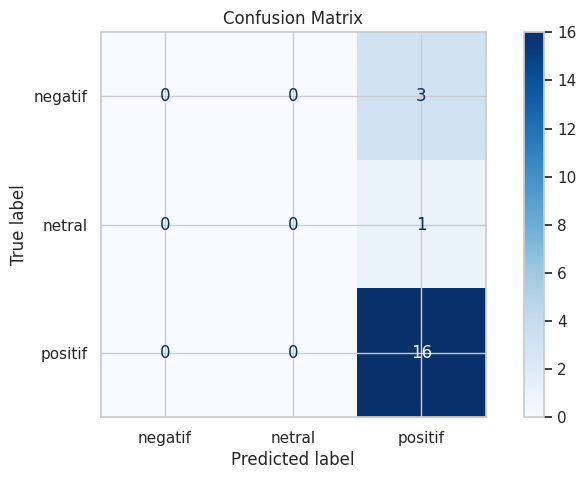

In [50]:
# STEP 16: Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['negatif', 'netral', 'positif'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negatif', 'netral', 'positif'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
